# ETL Project- Harry Potter

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

#### Store CSV Files into DataFrame

In [2]:
csv_file = "Resources/shortversioncharacters.csv"
Character_df = pd.read_csv(csv_file)
Character_df.head(5)

,name,species,gender,house,dateOfBirth,yearOfBirth,ancestry,eyeColour,hairColour,patronus,wand,hogwartsStudent,hogwartsStaff,actor,alive,image
0,Argus Filch,human,male,NaN,NaN,NaN,squib,NaN,grey,NaN,"{'wood': '', 'core': '', 'length': ''}",False,True,David Bradley,True,http://hp-api.herokuapp.com/images/filch.jpg
1,Arthur Weasley,human,male,Gryffindor,6/2/1950,1950.0,pure-blood,blue,red,weasel,"{'wood': '', 'core': '', 'length': ''}",False,False,Mark Williams,True,http://hp-api.herokuapp.com/images/arthur.jpg
2,Bellatrix Lestrange,human,female,Slytherin,NaN,1951.0,pure-blood,brown,black,NaN,"{'wood': 'walnut', 'core': 'dragon heartstring...",False,False,Helena Bonham Carter,False,http://hp-api.herokuapp.com/images/bellatrix.jpg
3,Cedric Diggory,human,male,Hufflepuff,NaN,1977.0,pure-blood,grey,brown,NaN,"{'wood': 'ash', 'core': 'unicorn hair', 'lengt...",True,False,Robert Pattinson,False,http://hp-api.herokuapp.com/images/cedric.png
4,Cho Chang,human,female,Ravenclaw,NaN,NaN,magical,brown,black,swan,"{'wood': '', 'core': '', 'length': ''}",True,False,Katie Leung,True,http://hp-api.herokuapp.com/images/cho.jpg


###### Clean Character Dataframe- drop unnecessary columns

In [3]:
Character_df.columns


Index(['name', 'species', 'gender', 'house', 'dateOfBirth', 'yearOfBirth',
       'ancestry', 'eyeColour', 'hairColour', 'patronus', 'wand',
       'hogwartsStudent', 'hogwartsStaff', 'actor', 'alive', 'image'],
      dtype='object')

In [4]:
Character_df = Character_df.rename(columns={'name': 'character_name', 'hogwartsStudent': 'hogwarts_student', 'hogwartsStaff': 'hogwarts_staff'})
Character_df.head(5)

,character_name,species,gender,house,dateOfBirth,yearOfBirth,ancestry,eyeColour,hairColour,patronus,wand,hogwarts_student,hogwarts_staff,actor,alive,image
0,Argus Filch,human,male,NaN,NaN,NaN,squib,NaN,grey,NaN,"{'wood': '', 'core': '', 'length': ''}",False,True,David Bradley,True,http://hp-api.herokuapp.com/images/filch.jpg
1,Arthur Weasley,human,male,Gryffindor,6/2/1950,1950.0,pure-blood,blue,red,weasel,"{'wood': '', 'core': '', 'length': ''}",False,False,Mark Williams,True,http://hp-api.herokuapp.com/images/arthur.jpg
2,Bellatrix Lestrange,human,female,Slytherin,NaN,1951.0,pure-blood,brown,black,NaN,"{'wood': 'walnut', 'core': 'dragon heartstring...",False,False,Helena Bonham Carter,False,http://hp-api.herokuapp.com/images/bellatrix.jpg
3,Cedric Diggory,human,male,Hufflepuff,NaN,1977.0,pure-blood,grey,brown,NaN,"{'wood': 'ash', 'core': 'unicorn hair', 'lengt...",True,False,Robert Pattinson,False,http://hp-api.herokuapp.com/images/cedric.png
4,Cho Chang,human,female,Ravenclaw,NaN,NaN,magical,brown,black,swan,"{'wood': '', 'core': '', 'length': ''}",True,False,Katie Leung,True,http://hp-api.herokuapp.com/images/cho.jpg


In [5]:
Clean_Character_df =Character_df.drop(['wand','dateOfBirth','yearOfBirth','hairColour','eyeColour','patronus'], axis =1)
Clean_Character_df.head(5)

,character_name,species,gender,house,ancestry,hogwarts_student,hogwarts_staff,actor,alive,image
0,Argus Filch,human,male,NaN,squib,False,True,David Bradley,True,http://hp-api.herokuapp.com/images/filch.jpg
1,Arthur Weasley,human,male,Gryffindor,pure-blood,False,False,Mark Williams,True,http://hp-api.herokuapp.com/images/arthur.jpg
2,Bellatrix Lestrange,human,female,Slytherin,pure-blood,False,False,Helena Bonham Carter,False,http://hp-api.herokuapp.com/images/bellatrix.jpg
3,Cedric Diggory,human,male,Hufflepuff,pure-blood,True,False,Robert Pattinson,False,http://hp-api.herokuapp.com/images/cedric.png
4,Cho Chang,human,female,Ravenclaw,magical,True,False,Katie Leung,True,http://hp-api.herokuapp.com/images/cho.jpg


In [6]:
# Gender


In [7]:
# House

#### Clean Script Data Frame

In [8]:
csv_file = "Resources/Harrypotter_script.csv"
script_df = pd.read_csv(csv_file)
script_df.head()

,ID_number,scene,character_name,dialogue
0,1,1,Albus Dumbledore,"I should have known that you would be here, Pr..."
1,2,1,Minerva McGonagall,"Good evening, Professor Dumbledore. Are the ru..."
2,3,1,Albus Dumbledore,"I'm afraid so, Professor. The good, and the bad."
3,4,1,Minerva McGonagall,And the boy?
4,5,1,Albus Dumbledore,Hagrid is bringing him.


In [9]:
script_df.drop(['ID_number'], axis=1)

,scene,character_name,dialogue
0,1,Albus Dumbledore,"I should have known that you would be here, Pr..."
1,1,Minerva McGonagall,"Good evening, Professor Dumbledore. Are the ru..."
2,1,Albus Dumbledore,"I'm afraid so, Professor. The good, and the bad."
3,1,Minerva McGonagall,And the boy?
4,1,Albus Dumbledore,Hagrid is bringing him.
...,...,...,...
788,34,Rubeus Hagrid,"Go on. On with you, on with you now. Oh, now l..."
789,34,Harry Potter,"But Hagrid, we're not allowed to do magic away..."
790,34,Rubeus Hagrid,"I do, but your cousin don't, do he? Eh? Hmmhmm"
791,34,Hermione Granger,"Feels strange to be going home, doesn't it?"


#### Count Dialogue lines per Character

In [10]:
script_count = script_df['character_name'].value_counts()
script_count.head(25)

Harry Potter            230
Ron Weasley             120
Hermione Granger         92
Rubeus Hagrid            81
Minerva McGonagall       31
Albus Dumbledore         24
Vernon Dursley           23
Dudley Dursley           17
Quirinus Quirrell        17
Neville Longbottom       14
Draco Malfoy             13
Petunia Dursley          13
Rolanda Hooch            12
Severus Snape             9
Lee Jordan                8
Voldemort                 8
Oliver Wood               8
Sorting Hat               7
Percy Weasley             6
Argus Filch               6
Nearly Headless Nick      5
Molly Weasley             5
Firenze                   5
Fred Weasley              5
Seamus Finnigan           5
Name: character_name, dtype: int64

In [11]:
# Write DataFrame to CSV
script_count.to_csv('Resources/script_count.csv')

In [12]:
#Read CSV
csv_file = "Resources/script_count.csv"
script_count_df = pd.read_csv(csv_file)
script_count_df.head()

,Unnamed: 0,character_name
0,Harry Potter,230
1,Ron Weasley,120
2,Hermione Granger,92
3,Rubeus Hagrid,81
4,Minerva McGonagall,31


In [13]:
script_count_df = script_count_df.rename(columns={'Unnamed: 0': 'character_name', 'character_name': 'lines_of_dialogue'})
script_count_df.head(5)

,character_name,lines_of_dialogue
0,Harry Potter,230
1,Ron Weasley,120
2,Hermione Granger,92
3,Rubeus Hagrid,81
4,Minerva McGonagall,31


In [14]:
character_script = pd.merge(left=Clean_Character_df, right=script_count_df, how='left', left_on='character_name', right_on='character_name')
character_script.head(5)

,character_name,species,gender,house,ancestry,hogwarts_student,hogwarts_staff,actor,alive,image,lines_of_dialogue
0,Argus Filch,human,male,NaN,squib,False,True,David Bradley,True,http://hp-api.herokuapp.com/images/filch.jpg,6.0
1,Arthur Weasley,human,male,Gryffindor,pure-blood,False,False,Mark Williams,True,http://hp-api.herokuapp.com/images/arthur.jpg,NaN
2,Bellatrix Lestrange,human,female,Slytherin,pure-blood,False,False,Helena Bonham Carter,False,http://hp-api.herokuapp.com/images/bellatrix.jpg,NaN
3,Cedric Diggory,human,male,Hufflepuff,pure-blood,True,False,Robert Pattinson,False,http://hp-api.herokuapp.com/images/cedric.png,NaN
4,Cho Chang,human,female,Ravenclaw,magical,True,False,Katie Leung,True,http://hp-api.herokuapp.com/images/cho.jpg,NaN


In [15]:
character_script['lines_of_dialogue'] = character_script['lines_of_dialogue'].fillna(0)
character_script.head(5)


,character_name,species,gender,house,ancestry,hogwarts_student,hogwarts_staff,actor,alive,image,lines_of_dialogue
0,Argus Filch,human,male,NaN,squib,False,True,David Bradley,True,http://hp-api.herokuapp.com/images/filch.jpg,6.0
1,Arthur Weasley,human,male,Gryffindor,pure-blood,False,False,Mark Williams,True,http://hp-api.herokuapp.com/images/arthur.jpg,0.0
2,Bellatrix Lestrange,human,female,Slytherin,pure-blood,False,False,Helena Bonham Carter,False,http://hp-api.herokuapp.com/images/bellatrix.jpg,0.0
3,Cedric Diggory,human,male,Hufflepuff,pure-blood,True,False,Robert Pattinson,False,http://hp-api.herokuapp.com/images/cedric.png,0.0
4,Cho Chang,human,female,Ravenclaw,magical,True,False,Katie Leung,True,http://hp-api.herokuapp.com/images/cho.jpg,0.0


In [16]:
# Plot Character vs lines of Dialogue

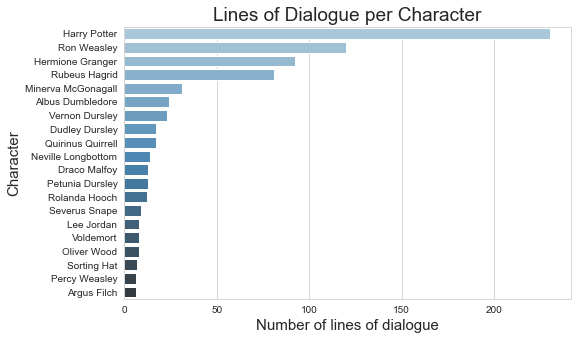

In [17]:
sns.set_style('whitegrid')
plt.figure(figsize=(8,5))
sns.countplot(y='character_name', data=script_df, order=script_df.character_name.value_counts().iloc[:20].index, palette="Blues_d")
plt.xlabel('Number of lines of dialogue', fontsize=15)
plt.ylabel('Character', fontsize=15)
plt.title( 'Lines of Dialogue per Character', fontsize=19)
plt.show()


In [18]:
#Plot House vs Dialogue

In [19]:
#Plot Gender vs Dialogue

In [20]:
#Saving DataEngine /SQL Server